In [555]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz

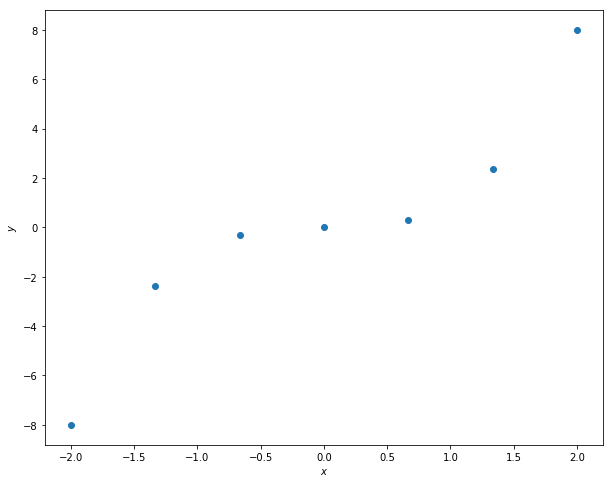

In [556]:
X = np.linspace(-2, 2, 7)
y = X ** 3

plt.scatter(X, y)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');

In [557]:
# Let's make several steps to build the decision tree. Let's choose the symmetric thresholds equal to 0, 1.5 and 
#-1.5 for partitioning. In the case of a regression task, the leaf outputs mean answer for all observations in this 
#leaf. Let's start from tree of depth 0 that contains all train observations. How will predictions of this tree look 
#like for x∈[−2,2]? Create the appropriate plot using a pen, paper and Python if it is needed (without using sklearn).

XX = [-1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5]
YY = [i**3 for i in XX]

import numpy as np
XX=np.array(XX).reshape(-1,1)
print(YY)

[-3.375, -1.0, -0.125, 0.0, 0.125, 1.0, 3.375]


In [558]:
from sklearn.tree import DecisionTreeRegressor
tr=DecisionTreeRegressor(random_state=3, max_depth=1)
tr.fit(XX,YY)

DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=3, splitter='best')

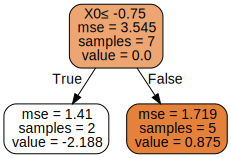

In [559]:
tr_data = export_graphviz(tr, out_file=None, filled=True, rounded=True, special_characters=True, 
                           feature_names=None) 
tr_graph = graphviz.Source(tr_data)
tr_graph

In [560]:
yy = [-3.375, -1.0, -0.125, 0.0, 0.125, 1.0, 3.375]
#xx = [-3.375,-3.375,-3.375,-3.375,-3.375,-3.375,-3.375]
#xx = [3.375,3.375,3.375,3.375,3.375,3.375,3.375]
xx = [0,0,0,0,0,0,0]
xx=np.array(xx).astype(float)
yy=np.array(yy).astype(float)
mse = ((xx - yy) ** 2).mean()
print(mse)

3.544642857142857


In [561]:
aa=[]
yy = [-3.375, -1.0, -0.125, 0.0, 0.125, 1.0, 3.375]

for i in yy:
    xx=np.full_like(yy,i).astype(float)
    mse = round(((xx - yy) ** 2).mean(),2)
    aa.append(mse)
print(aa)

[14.94, 4.54, 3.56, 3.54, 3.56, 4.54, 14.94]


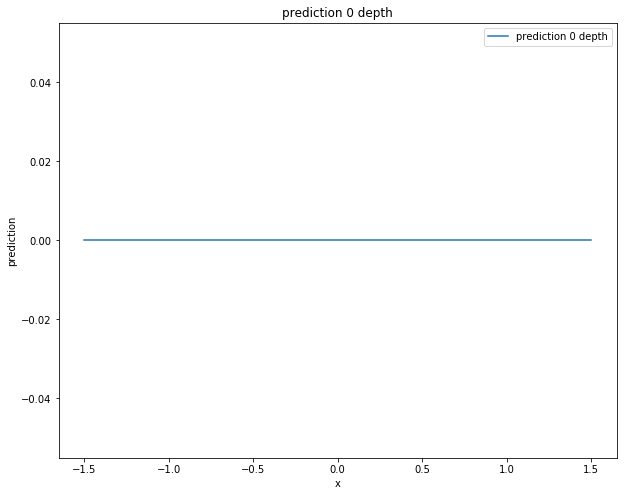

In [562]:
# min mse, when a = 0, y = [-3.375, -1.0, -0.125, 0.0, 0.125, 1.0, 3.375]
c=[-1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5]
d=[0,0,0,0,0,0,0]
plt.rcParams['figure.figsize'] = (10,8) 

plt.plot(c, d, label="prediction 0 depth")

plt.xlabel('x')
plt.ylabel('prediction')
plt.title('prediction 0 depth')
plt.legend();

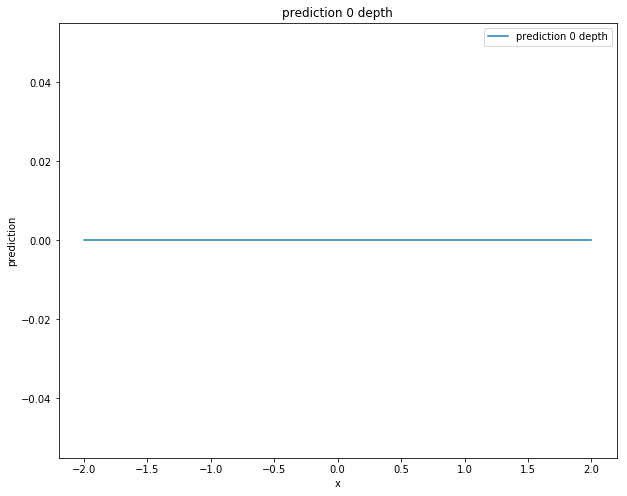

In [563]:
# min mse, when a = 0, y = [-4.0, -3.375, -1.0, -0.125, 0.0, 0.125, 1.0, 3.375, 4.0]
c=[-2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0]
d=[0,0,0,0,0,0,0,0,0]
plt.rcParams['figure.figsize'] = (10,8) 

plt.plot(c, d, label="prediction 0 depth")

plt.xlabel('x')
plt.ylabel('prediction')
plt.title('prediction 0 depth')
plt.legend();

In [564]:
aa=[]
yy = [-4.0, -3.375, -1.0, -0.125]

for i in yy:
    xx=np.full_like(yy,i).astype(float)
    mse = round(((xx - yy) ** 2).mean(),2)
    aa.append(mse)
print(aa)

[6.1, 4.15, 3.85, 6.59]


In [565]:
aa=[]
yy = [0.0, 0.125, 1.0, 3.375, 4.0]

for i in yy:
    xx=np.full_like(yy,i).astype(float)
    mse = round(((xx - yy) ** 2).mean(),2)
    aa.append(mse)
print(aa)

[5.68, 5.27, 3.28, 5.6, 8.08]


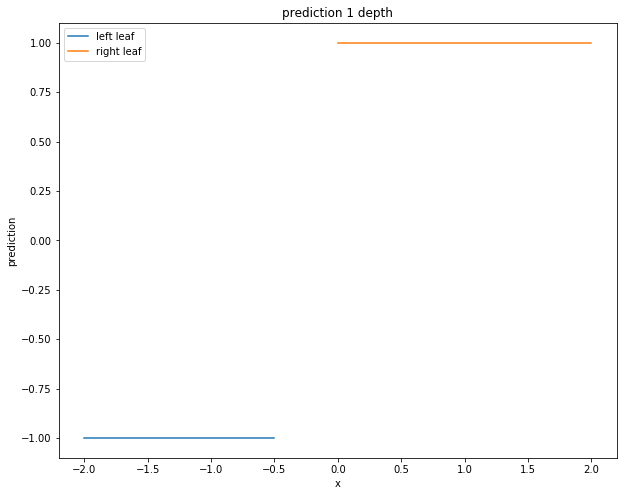

In [566]:
# Let's split the data according to the following condition [x<0]. It gives us the tree of depth 1 with two leaves. 
#Let's create a similar plot for predictions of this tree.

# min mse, when a = 0, y = [-4.0, -3.375, -1.0, -0.125, 0.0, 0.125, 1.0, 3.375, 4.0]
c=[-2.0, -1.5, -1.0, -0.5]
d=[-1,-1,-1,-1]

e=[0.0, 0.5, 1.0, 1.5, 2.0]
f=[1,1,1,1,1]
plt.rcParams['figure.figsize'] = (10,8) 

plt.plot(c, d, label="left leaf")
plt.plot(e, f, label="right leaf")

plt.xlabel('x')
plt.ylabel('prediction')
plt.title('prediction 1 depth')
plt.legend();

In [567]:
#Q(X,j,t)=D(X)−|Xl||X|D(Xl)−|Xr||X|D(Xr),

#def regression_var_criterion(X, y, t):
#    for i in X:
#        for j in y:
#            D= 1/abs(i) * (j-1/abs(i)* i ** 3)**2
#            Dleft= 1/abs(i) * (j-1/abs(i)* i ** 3)**2
#            Dright= 1/abs(i) * (j-1/abs(i)* i ** 3)**2
#    regression_var_criterion=D-(abs(t)/abs(len(X)))*Dleft-(abs(len(X)-t)/abs(len(X)))*Dright
#    return regression_var_criterion 

In [568]:
def regression_var_criterion(X, y, t): 
    X_left, y_left = X[X < t], y[X < t] 
    X_right, y_right = X[X >= t], y[X >= t] 
    return np.var(y) - X_left.shape[0] / X.shape[0] * np.var(y_left) - X_right.shape[0] / X.shape[0] * np.var(y_right)

In [569]:
#Create the plot of the function Q(X,t) in the root depending on the threshold value t on the interval [−1.9,1.9].
X=np.linspace(-1.9, 1.9, 7)
y=[i**3 for i in X]
y=np.array(y)
regression_var_criterion(X,y,t=0.5)

6.969760148148145

In [570]:
thresholds=np.linspace(-1.9, 1.9, 50)
var=[]
for i in thresholds:
    var.append(regression_var_criterion(X,y,t=i))
var=np.array(var)
print(var)

[       nan 7.84098017 7.84098017 7.84098017 7.84098017 7.84098017
 7.84098017 7.84098017 7.84098017 7.90551498 7.90551498 7.90551498
 7.90551498 7.90551498 7.90551498 7.90551498 7.90551498 6.96976015
 6.96976015 6.96976015 6.96976015 6.96976015 6.96976015 6.96976015
 6.96976015 6.96976015 6.96976015 6.96976015 6.96976015 6.96976015
 6.96976015 6.96976015 6.96976015 7.90551498 7.90551498 7.90551498
 7.90551498 7.90551498 7.90551498 7.90551498 7.90551498 7.84098017
 7.84098017 7.84098017 7.84098017 7.84098017 7.84098017 7.84098017
 7.84098017 7.84098017]


/Users/klavdius/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3157: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/klavdius/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/klavdius/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


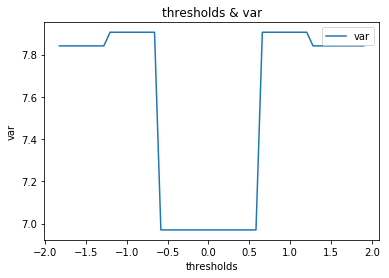

In [571]:
plt.rcParams['figure.figsize'] = (6,4) 

plt.plot(thresholds, var, label="var")

plt.xlabel('thresholds')
plt.ylabel('var')
plt.title('thresholds & var')
plt.legend();

# Question 1. Is the threshold value t=0 optimal according to the variance criterion?

Yes
No

In [572]:
# 1 ANSWER - NO (if var_criterion bigger than better)

In [573]:
# Then let's make splitting in each of the leaves' nodes. In the left branch (where previous split was x<0) using 
#the criterion [x<−1.5], in the right branch (where previous split was x⩾0) with the following criterion [x<1.5]. 
#It gives us the tree of depth 2 with 7 nodes and 4 leaves. 
#Create the plot of these tree predictions for x∈[−2,2].

# Question 2. How many segments are there on the plot of tree predictions in the interval [-2, 2] (it is necessary to count only horizontal and lines)?

2
3
4
5

In [574]:
# 2 ANSWER - 4

In [575]:
#yy = [-4.0, -3.375, -1.0, -0.125]

aa=[]
yy = [-3.375, -1.0, -0.125]

for i in yy:
    xx=np.full_like(yy,i).astype(float)
    mse = round(((xx - yy) ** 2).mean(),2)
    aa.append(mse)
print(aa)

[5.4, 2.14, 3.78]


In [576]:
#yy = [0.0, 0.125, 1.0, 3.375, 4.0]
aa=[]
yy = [0.0, 0.125, 1.0]

for i in yy:
    xx=np.full_like(yy,i).astype(float)
    mse = round(((xx - yy) ** 2).mean(),2)
    aa.append(mse)
print(aa)

[0.34, 0.26, 0.59]


In [577]:
#yy = [0.0, 0.125, 1.0, 3.375, 4.0]
aa=[]
yy = [3.375, 4.0]

for i in yy:
    xx=np.full_like(yy,i).astype(float)
    mse = round(((xx - yy) ** 2).mean(),2)
    aa.append(mse)
print(aa)

[0.2, 0.2]


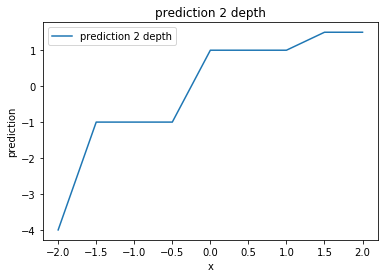

In [578]:
# min mse, when a = 0, y = [-4.0, -3.375, -1.0, -0.125, 0.0, 0.125, 1.0, 3.375, 4.0]
first=np.linspace(-2.0, 2.0, 9)
second=[-4.0, -1.0,-1.0,-1.0,1.0,1.0,1.0,1.5,1.5]
second=np.array(second)

plt.rcParams['figure.figsize'] = (6,4) 
plt.plot(first, second, label="prediction 2 depth")
plt.xlabel('x')
plt.ylabel('prediction')
plt.title('prediction 2 depth')
plt.legend();

# 2. Building a decision tree for predicting heart deseases

In [579]:
df = pd.read_csv("https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/mlbootcamp5_train.csv", index_col='id', sep=';')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


In [580]:
#Transform the features: create "age in years" (full age) and also create 3 binary features based on cholesterol 
# and 3 more on gluc, where they are equal to 1, 2 or 3. 
#This method is called dummy-encoding or One Hot Encoding (OHE). It is more convenient to use pandas.get_dummmies.. 
#There is no need to use the original features cholesterol and gluc after encoding.
df["age"] = df["age"].astype("float")
df["age_in_years"]=df["age"].div(365,25).round()
print(df["age_in_years"].head())

id
0    50.0
1    55.0
2    52.0
3    48.0
4    48.0
Name: age_in_years, dtype: float64


In [581]:
df=pd.concat([df, pd.get_dummies(df["cholesterol"], prefix="chol")], axis=1)
df=pd.concat([df, pd.get_dummies(df["gluc"], prefix="glu")], axis=1)
df=df.drop(columns=["cholesterol","gluc"])
print(df.head())

        age  gender  height  weight  ap_hi  ap_lo  smoke  alco  active  \
id                                                                       
0   18393.0       2     168    62.0    110     80      0     0       1   
1   20228.0       1     156    85.0    140     90      0     0       1   
2   18857.0       1     165    64.0    130     70      0     0       0   
3   17623.0       2     169    82.0    150    100      0     0       1   
4   17474.0       1     156    56.0    100     60      0     0       0   

    cardio  age_in_years  chol_1  chol_2  chol_3  glu_1  glu_2  glu_3  
id                                                                     
0        0          50.0       1       0       0      1      0      0  
1        1          55.0       0       0       1      1      0      0  
2        1          52.0       0       0       1      1      0      0  
3        1          48.0       1       0       0      1      0      0  
4        0          48.0       1       0       0 

In [582]:
# Split data into train and holdout parts in the proportion of 7/3 using sklearn.model_selection.train_test_split 
#with random_state=17.
X = df.drop(columns=["cardio"])
y = df["cardio"]

X_train, X_valid, y_train, y_valid = train_test_split (X, y, train_size=0.7, random_state=17)

/Users/klavdius/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [583]:
#Train the decision tree on the dataset (X_train, y_train) with max depth equals to 3 and random_state=17. 
#Plot this tree with sklearn.tree.export_graphviz, dot and pydot. You don't need to use quotes in the file 
#names in order to make it work in a jupyter notebook. 
#The commands starting from the exclamation mark are terminal commands that are usually run in terminal/command line.

tree=DecisionTreeClassifier(max_depth=3, random_state=17)
tree.fit(X_train, y_train, )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

In [584]:
!port install graphviz
!pip install pydot

Error: Insufficient privileges to write to MacPorts install prefix.


In [585]:
import graphviz
from sklearn.tree import export_graphviz

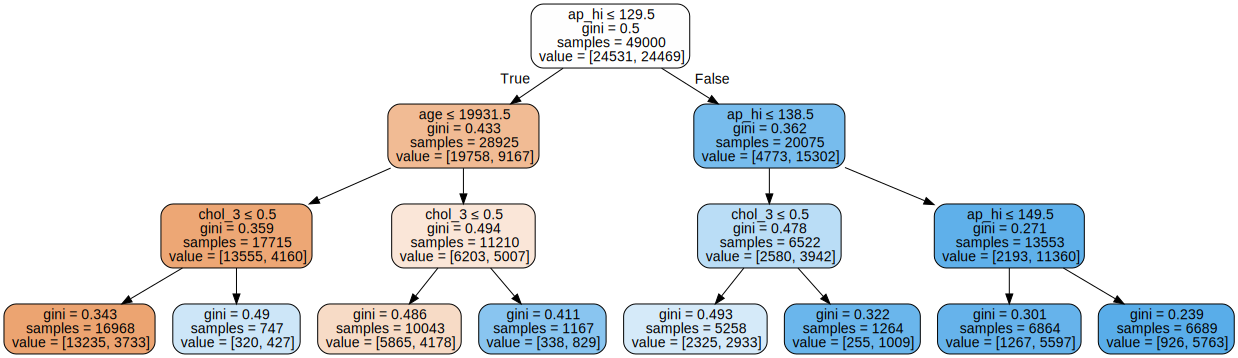

In [586]:
dot_data = export_graphviz(tree, out_file=None, filled=True, rounded=True, special_characters=True, 
                           feature_names=X_train.columns) 
graph = graphviz.Source(dot_data)
graph

# Question 3. What 3 features are used to make predictions in the created decision tree?

weight, height, gluc=3
smoke, age, gluc=3
age, weight, chol=3
age, ap_hi, chol=3

In [587]:
# ANSWER - age, ap_hi, chol=3

In [588]:
# Make predictions for holdout data (X_valid, y_valid) with the trained decision tree. Calculate accuracy.
tree_predict = tree.predict(X_valid)
accuracy_score(y_valid,tree_predict)

0.7212857142857143

In [589]:
#Set up the depth of the tree using cross-validation on the dataset (X_train, y_train) in order to increase 
#quality of the model. Use GridSearchCV with 5 folds. Fix random_state=17 and change max_depth from 2 to 10.
random_state=17
tree_params = {'max_depth': list(range(2, 11))}
tree_grid = GridSearchCV (tree, tree_params, cv=5)
%time
tree_grid.fit(X_train, y_train)      

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 11.9 µs


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [590]:
print(tree_grid.cv_results_["param_max_depth"])
print(tree_grid.cv_results_["mean_test_score"])
print(type(tree_grid.cv_results_["param_max_depth"]))
print(type(tree_grid.cv_results_["mean_test_score"]))
print(tree_grid.cv_results_["param_max_depth"].astype("float"))
print(tree_grid.cv_results_["mean_test_score"].astype("float"))
#print(tree_grid.cv_results_)

[2 3 4 5 6 7 8 9 10]
[0.7155102  0.72771429 0.7304898  0.73095918 0.73195918 0.73038776
 0.72953061 0.72789796 0.7262449 ]
<class 'numpy.ma.core.MaskedArray'>
<class 'numpy.ndarray'>
[2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0]
[0.7155102  0.72771429 0.7304898  0.73095918 0.73195918 0.73038776
 0.72953061 0.72789796 0.7262449 ]


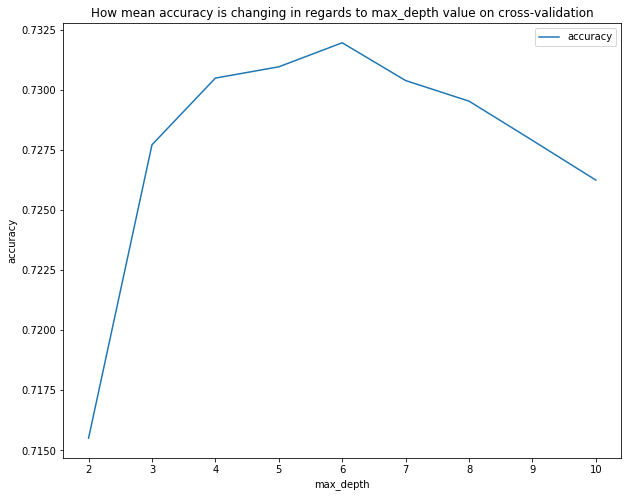

In [591]:
# Draw the plot to show how mean accuracy is changing in regards to max_depth value on cross-validation.
plt.rcParams['figure.figsize'] = (10,8) 

plt.plot(tree_grid.cv_results_["param_max_depth"].astype("int"), 
         tree_grid.cv_results_["mean_test_score"].astype("float"), label="accuracy")

plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('How mean accuracy is changing in regards to max_depth value on cross-validation')
plt.legend();

In [592]:
# Print the best value of max_depth where the mean value of cross-validation quality metric reachs maximum. 
# Also compute accuracy on holdout data. All these computations are 
# possible to make using the trained instance of the class GridSearchCV.
print("Best params:", tree_grid.best_params_)
print("Best cross validaton score", tree_grid.best_score_)

Best params: {'max_depth': 6}
Best cross validaton score 0.7319591836734693


In [593]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score (tree_grid, X_valid, y_valid, cv=5))

0.7327142857142857

# Question 4. Is there a local maximum of accuracy on the built validation curve? Did GridSearchCV help to tune max_depth so that there's been at least 1% change in holdout accuracy? (check out the expression (acc2 - acc1) / acc1 * 100%, where acc1 and acc2 are accuracies on holdout data before and after tuning max_depth with GridSearchCV respectively)?

yes, yes
yes, no
no, yes
no, no

In [594]:
acc1 = accuracy_score(y_valid,tree_predict)
print(acc1)

0.7212857142857143


In [595]:
tree_grid_predict = tree_grid.predict(X_valid)
acc2 = accuracy_score(y_valid,tree_grid_predict)
print(acc2)

0.7258095238095238


In [596]:
tree_tuned=DecisionTreeClassifier(max_depth = 6, random_state = 17)
tree_tuned.fit(X_train, y_train)
tree_tuned_predict = tree_tuned.predict(X_valid)
acc3 = accuracy_score(y_valid,tree_tuned_predict)
print(acc3)

0.7258095238095238


In [597]:
round(((acc2 - acc1) / acc1) * 100,0)

1.0

In [598]:
# ANSWER - yes, yes  (or yes-no?)( 1)local max = max_depth=6, 2)0,63% - 1% increasing )

# Question 5. What binary feature is the most important for heart disease detection (it is placed in the root of the tree)?

Systolic blood pressure from 160 to 180 (mmHg)
Gender male / female
Systolic blood pressure from 140 to 160 (mmHg)
Age from 50 to 55 (years)
Smokes / doesn't smoke
Age from 60 to 65 (years)

In [599]:
df1=df.copy()
df1.head()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,age_in_years,chol_1,chol_2,chol_3,glu_1,glu_2,glu_3
id,,,,,,,,,,,,,,,,,
0,18393.0,2,168,62.0,110,80,0,0,1,0,50.0,1,0,0,1,0,0
1,20228.0,1,156,85.0,140,90,0,0,1,1,55.0,0,0,1,1,0,0
2,18857.0,1,165,64.0,130,70,0,0,0,1,52.0,0,0,1,1,0,0
3,17623.0,2,169,82.0,150,100,0,0,1,1,48.0,1,0,0,1,0,0
4,17474.0,1,156,56.0,100,60,0,0,0,0,48.0,1,0,0,1,0,0


In [600]:
# Create binary features according to this picture:
# age∈[40,50),…age∈[60,65) (4 features)
# systolic blood pressure: ap_hi∈[120,140),ap_hi∈[140,160),ap_hi∈[160,180), (3 features)

#df["age_in_years"] = df["age_in_years"].map({df[(df["age_in_years"] >=30) and (df["age_in_years"] < 40)] : "0",
#                                             df[(df["age_in_years"] >=40) and (df["age_in_years"] < 50)] : "1",
#                                           df[(df["age_in_years"] >=50) and (df["age_in_years"] < 60)] : "2",
#                                            df[(df["age_in_years"] >=60) and (df["age_in_years"] < 65)] : "3"})

In [601]:
df1.loc[(df1["age_in_years"] > 0) & (df1["age_in_years"] < 40),"age_in_years"] = 0
df1.loc[(df1["age_in_years"] >=40) & (df1["age_in_years"] < 50),"age_in_years"] = 1
df1.loc[(df1["age_in_years"] >=50) & (df1["age_in_years"] < 55),"age_in_years"] = 2
df1.loc[(df1["age_in_years"] >=55) & (df1["age_in_years"] < 60),"age_in_years"] = 3
df1.loc[(df1["age_in_years"] >=60) & (df1["age_in_years"] < 65),"age_in_years"] = 4
df1.loc[(df1["age_in_years"] >=65) & (df1["age_in_years"] < 200),"age_in_years"] = 0

df1["age_in_years"].unique()

array([2., 3., 1., 4., 0.])

In [602]:
df1.loc[(df1["ap_hi"] < 120),"ap_hi"] = 0
df1.loc[(df1["ap_hi"] >=120) & (df1["ap_hi"] < 140),"ap_hi"] = 1
df1.loc[(df1["ap_hi"] >=140) & (df1["ap_hi"] < 160),"ap_hi"] = 2
df1.loc[(df1["ap_hi"] >=160) & (df1["ap_hi"] < 180),"ap_hi"] = 3
df1.loc[(df1["ap_hi"] >=180),"ap_hi"] = 0


df1["ap_hi"].unique()

array([0, 2, 1, 3])

In [603]:
# If the values of age or blood pressure don't fall into any of the intervals then all binary features will be equal 
# to zero. Then we create decision tree with these features and additional smoke, cholesterol and gender features. 
#Transform the cholesterol to 3 binary features according to it's 3 unique values ( cholesterol=1, cholesterol=2 and 
#cholesterol=3). This method is called dummy-encoding or One Hot Encoding (OHE). Transform the gender from 1 and 
#2 into 0 and 1. It is better to rename it to male (0 – woman, 1 – man). In general, this is typically done with 
#sklearn.preprocessing.LabelEncoder but here in case of only 2 unique values it's not necessary.
#Finally the decision tree is built using 12 binary features (without original features).
df1["gender"] = df1["gender"].map({1:"0", 2:"1"})
df1.head()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,age_in_years,chol_1,chol_2,chol_3,glu_1,glu_2,glu_3
id,,,,,,,,,,,,,,,,,
0,18393.0,1,168,62.0,0,80,0,0,1,0,2.0,1,0,0,1,0,0
1,20228.0,0,156,85.0,2,90,0,0,1,1,3.0,0,0,1,1,0,0
2,18857.0,0,165,64.0,1,70,0,0,0,1,2.0,0,0,1,1,0,0
3,17623.0,1,169,82.0,2,100,0,0,1,1,1.0,1,0,0,1,0,0
4,17474.0,0,156,56.0,0,60,0,0,0,0,1.0,1,0,0,1,0,0


In [604]:
df1=pd.concat([df1, pd.get_dummies(df1["ap_hi"], prefix="ap_hi")], axis=1)
df1=pd.concat([df1, pd.get_dummies(df1["age_in_years"], prefix="age_in_years")], axis=1)
df1=df1.drop(columns=["age_in_years","ap_hi"])
df1=df1.drop(columns=["age","height","weight","ap_lo","active","alco","glu_1","glu_2","glu_3"], axis=1)
df1.head()

,gender,smoke,cardio,chol_1,chol_2,chol_3,ap_hi_0,ap_hi_1,ap_hi_2,ap_hi_3,age_in_years_0.0,age_in_years_1.0,age_in_years_2.0,age_in_years_3.0,age_in_years_4.0
id,,,,,,,,,,,,,,,
0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0
1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
2,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0
3,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0
4,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0


In [605]:
X = df1.drop(columns=["cardio"])
y = df1["cardio"]
X_train, X_valid, y_train, y_valid = train_test_split (X, y, train_size=0.7, random_state=17)

/Users/klavdius/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [606]:
# Create a decision tree with the limitation max_depth=3 and train it on the whole train data. Use the 
#DecisionTreeClassifier class with fixed random_state=17, 
#but all other arguments (except for max_depth and random_state) should be set by default.
tree2=DecisionTreeClassifier(random_state=17, max_depth=3)
tree2.fit(X_train,y_train)

from sklearn.model_selection import cross_val_score
np.mean(cross_val_score (tree2, X_valid, y_valid, cv=5))

0.7040476190476189

In [607]:
# ANSWER - Systolic blood pressure from 140 to 160

In [608]:
print(tree2.__getstate__())

{'criterion': 'gini', 'splitter': 'best', 'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.0, 'max_features': None, 'random_state': 17, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'class_weight': None, 'presort': False, 'n_features_': 14, 'n_outputs_': 1, 'classes_': array([0, 1]), 'n_classes_': 2, 'max_features_': 14, 'tree_': <sklearn.tree._tree.Tree object at 0x1a1e085440>, '_sklearn_version': '0.19.2'}


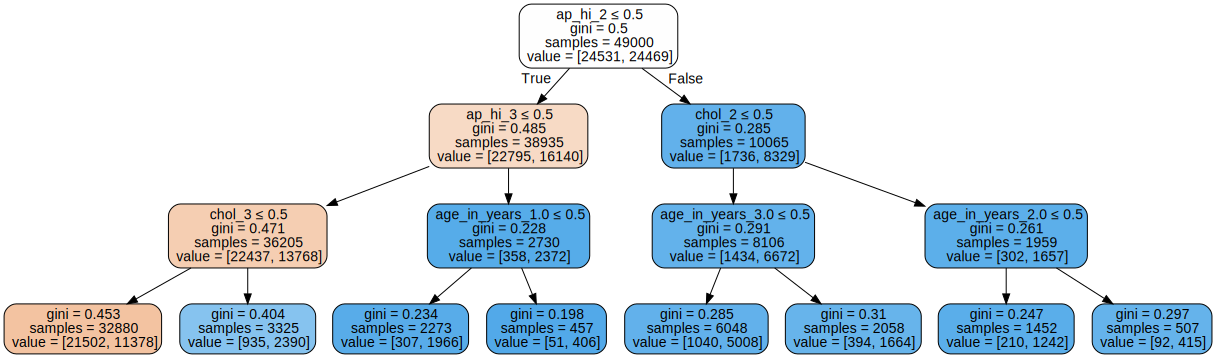

In [609]:
dot_data1 = export_graphviz(tree2, out_file=None, filled=True, rounded=True, special_characters=True, 
                           feature_names=X_train.columns) 
graph1 = graphviz.Source(dot_data1)
graph1